# CS5242

## Load Data

In [1]:
from data import Data
import numpy as np

full_train = Data(data_type='train',max_files=1000)

# idx = np.random.permutation(len(full_train.x))
# full_train_x,full_train_y = full_train.x[idx], full_train.y[idx]
full_train_x,full_train_y = full_train.x, full_train.y


del full_train

val_data_x, train_data_x = full_train_x[:full_train_x.shape[0]//6,:], full_train_x[full_train_x.shape[0]//6:,:]
val_data_y,train_data_y = full_train_y[:full_train_y.shape[0]//6,:], full_train_y[full_train_y.shape[0]//6:,:]

print("Train data: x:"+ str(train_data_x.shape)+ ' y:'+str(train_data_y.shape))
print("Validation data: x:"+ str(val_data_x.shape)+ ' y:'+str(val_data_y.shape))



Loading train data 1000/1000: 100%|███████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Normalizing x data using normalize factors:  [3.0, 3.0, 43.586509704589844, 12.0, 10.0, 3.0, 4.0, 7.0, 2417.0, 17728.333984375, 58425.0, 6.584963321685791, 31.0, 78.0, 58.0, 16.0, 43.0, 24.0]
Train data: x:(834, 1000, 102) y:(834, 1)
Validation data: x:(166, 1000, 102) y:(166, 1)


## Model

In [2]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

model_name = 'boosting_template_2'

def create_model(show_summary = False):
    model = tf.keras.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True),input_shape=(1000,102)),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

    model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4,0.9,0.999),
              metrics=['accuracy',tf.keras.metrics.AUC()])
    
    if show_summary:
        model.summary()
    
    return model
    
num_of_bags = 10
epochs_per_bag = 250
start_from_bag = 0


## Training with Boosting

Training bag 0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

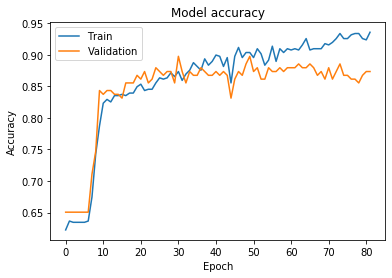

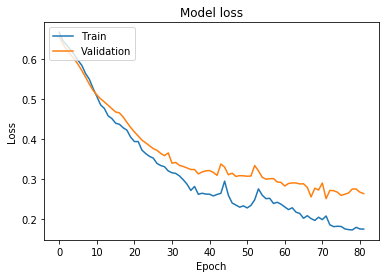

Training bag 1
(834, 1)
(834,)
[0.03728434 0.85787392 0.0067364  0.31992429 0.03779447 0.03439972
 0.00603503 0.01215684 0.04056829 0.07800126 0.73701602 0.03162679
 0.77739984 0.24559283 0.00396502 0.02460599 0.00752771 0.00961098
 0.75613737 0.0341711  0.91550797 0.04921854 0.03360248 0.01022115
 0.0192064  0.03555593 0.28750968 0.59854037 0.01579005 0.01747531
 0.01250407 0.00769031 0.03222558 0.45228079 0.0323554  0.97611094
 0.02586174 0.79728961 0.00987631 0.00994724 0.0577895  0.20905098
 0.07133341 0.03321099 0.02477682 0.15238273 0.54072398 0.74786609
 0.0340305  0.00779128 0.02073723 0.03776872 0.0212402  0.89181727
 0.01884174 0.00741065 0.03863418 0.66956756 0.01760352 0.01462463
 0.00964573 0.01303864 0.17214322 0.00968707 0.00927746 0.97413349
 0.20156503 0.03270015 0.27281535 0.01745713 0.09733507 0.01910365
 0.0325965  0.19487134 0.03371489 0.02983141 0.60973203 0.1469616
 0.24170008 0.00727248 0.27238315 0.03632304 0.1714412  0.01627338
 0.04941404 0.20702946 0.0189521

Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Normalizing x data using normalize factors:  [3.0, 3.0, 43.586509704589844, 12.0, 10.0, 3.0, 4.0, 7.0, 2417.0, 17728.333984375, 58425.0, 6.584963321685791, 31.0, 78.0, 58.0, 16.0, 43.0, 24.0]
(6051, 1)
(6051,)
Saved to result_boosting_template_2_boost1.csv
[0.03404772 0.01721001 0.52513832 0.01684773 0.94156682 0.86710632
 0.22506049 0.26335353 0.17214322 0.99040699 0.97137517 0.22048494
 0.17699021 0.33522475 0.77764302 0.00396526 0.92734772 0.89181727
 0.81610942 0.92734772 0.56960392 0.02073723 0.49640131 0.86976779
 0.923455   0.11345136 0.38705659 0.97611094 0.45543614 0.73701602
 0.42848945 0.2181493  0.20905098 0.89181727 0.99186814 0.24124342
 0.6556288  0.94156682 0.90008345 0.01740623 0.97968483 0.54397047
 0.60973203 0.4017303  0.57047856 0.59854037 0.8044619  0.72345424
 0.73701602 0.923455   0.09242988 0.428725   0.99040699 0.94156682
 0.86710632 0.97413349 0.37632459 0.49640131 0.41387379 0.77903461
 0.53917444 0.1944046  0.9625541  0.0072999  0.23433095 0.97413349
 0.927

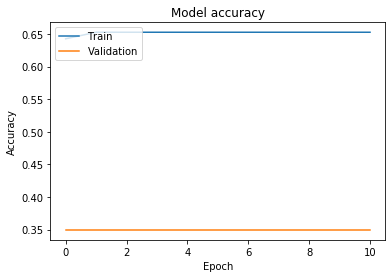

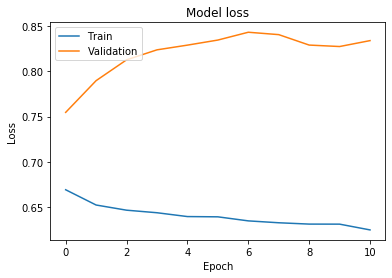

Training bag 2
(834, 2)
(834,)
[0.23785292 0.71738774 0.29511982 0.44518852 0.23768455 0.23557737
 0.29535949 0.22528785 0.30547875 0.32890528 0.58096266 0.23420729
 0.60157764 0.33407533 0.2937398  0.29739404 0.30011958 0.22384332
 0.65892535 0.3055883  0.67618054 0.30203062 0.29862809 0.22449832
 0.29505932 0.23618506 0.35692507 0.58238649 0.22674517 0.29004127
 0.22514565 0.28740203 0.23483664 0.44553617 0.23450142 0.71109736
 0.298235   0.60820335 0.30047405 0.22311629 0.31666625 0.32534474
 0.31000257 0.23497321 0.29756272 0.36144644 0.48906541 0.588916
 0.3021487  0.29525214 0.3062228  0.30121893 0.22750495 0.66541284
 0.30022985 0.29972768 0.30170047 0.61757967 0.29012686 0.22618474
 0.22351709 0.22545007 0.30670118 0.2906577  0.22415057 0.70579761
 0.38679147 0.23717974 0.40825671 0.29662853 0.27369976 0.29477942
 0.23392753 0.32083803 0.30198514 0.30355883 0.51515692 0.28691626
 0.3420347  0.29978251 0.4209981  0.23758395 0.36708552 0.29438055
 0.30207694 0.32294559 0.2965315 

Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Normalizing x data using normalize factors:  [3.0, 3.0, 43.586509704589844, 12.0, 10.0, 3.0, 4.0, 7.0, 2417.0, 17728.333984375, 58425.0, 6.584963321685791, 31.0, 78.0, 58.0, 16.0, 43.0, 24.0]
(6051, 2)
(6051,)
Saved to result_boosting_template_2_boost2.csv
[0.29919183 0.28852296 0.51161087 0.30262047 0.47353196 0.30023289
 0.29002476 0.30204701 0.29274499 0.3517583  0.25727838 0.30218613
 0.6879766  0.29793131 0.66541284 0.42664421 0.22601967 0.29756844
 0.52621299 0.31977993 0.40591836 0.29695308 0.54234624 0.33263791
 0.66656709 0.31666625 0.29740804 0.60620558 0.29512429 0.24827886
 0.4985317  0.22524326 0.29698968 0.57758552 0.22415057 0.48021609
 0.68273437 0.33335131 0.71337664 0.34208855 0.71970993 0.50911951
 0.29748034 0.22668386 0.29002476 0.71109736 0.65847033 0.29831547
 0.32464755 0.30999917 0.32730019 0.43456161 0.60820335 0.23557737
 0.31089473 0.29988617 0.30010635 0.29471624 0.22449832 0.39168644
 0.29921055 0.38679147 0.35692507 0.3062228  0.72579598 0.54234624
 0.298

In [ ]:
import os
import matplotlib.pyplot as plt
import csv
import math
from data import Data

%matplotlib inline
    
training_loss = np.ones(train_data_x.shape[0])

for bag in range(num_of_bags):
    # skip training
    if bag < start_from_bag:
        print("skiping bag "+str(bag))
        continue
    print("Training bag "+str(bag))

    # Put data into bags
    model = create_model(False)
    train_size = train_data_x.shape[0]//10*6
    if bag != 0 :
        # Check prediction for training data
        for validate_bag in range(bag):
            checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(validate_bag)
            model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
            if validate_bag == 0:
                predictions = model.predict(train_data_x)
            else:
                predictions = np.concatenate((predictions,model.predict(train_data_x)),axis=1)
        print(predictions.shape)

        avg_predictions = np.mean(predictions, axis=1)
        print(avg_predictions.shape)
        
        # Select training data poorly predicted 
        training_loss = avg_predictions-np.reshape(train_data_y,(train_data_y.shape[0]))
        training_loss = np.absolute(training_loss)
        print(training_loss)
        
        # Save Predictions for test data
        test_data = Data(data_type='test')
        for validate_bag in range(bag):
            checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(validate_bag)
            model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
            if validate_bag == 0:
                predictions = model.predict(test_data.x)
            else:
                predictions = np.concatenate((predictions,model.predict(test_data.x)),axis=1)
        print(predictions.shape)

        avg_predictions = np.mean(predictions, axis=1)
        print(avg_predictions.shape)
        
        output_file = 'result_' + model_name +'_boost'+ str(bag) +'.csv'
        with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
            csv_writer = csv.writer(output_file)
            csv_writer.writerow(('Id', 'Predicted'))
            for id, predict in enumerate(avg_predictions):
                csv_writer.writerow((id, predict))
        print('Saved to '+'result_' + model_name +'_boost'+ str(bag) +'.csv')
        # Free memory space for test data
        del test_data
        
        
    
    weights = training_loss / np.sum(training_loss, axis=0)
    idx = np.random.choice(np.arange(0, weights.shape[0]),train_size, p=weights)
    print(training_loss[idx])
    bag_x,bag_y = train_data_x[idx], train_data_y[idx]
        
    del model
        
    ## TODO define different models if possible
    model = create_model(bag==0)
    # Directory where the checkpoints will be saved
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    # Name of the checkpoint files
    checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

    checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_prefix,
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True)

    early_stopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        min_delta=0, 
        patience=10, 
        mode='auto', 
        restore_best_weights=True)
        
        
        
    history = model.fit(x=bag_x,y=bag_y, validation_data=(val_data_x,val_data_y), epochs=epochs_per_bag,batch_size=32,
                    callbacks=[checkpoint_callback,early_stopping_callback], verbose=2,shuffle=True)
    
    print()
    
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    del model,history,bag_x,bag_y
    

## Restore Weights

In [ ]:
checkpoint_dir = './checkpoints/' + model_name
model = create_model()

import numpy as np
from data import Data

test_data = Data(data_type='test')
print("Test data: x:"+ str(test_data.x.shape)+ ' y:'+str(test_data.y.shape))

for bag in range(num_of_bags):
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
    if bag == 0:
        predictions = model.predict(test_data.x)
    else:
        predictions = np.concatenate((predictions,model.predict(test_data.x)),axis=1)
print(predictions.shape)

avg_predictions = np.mean(predictions, axis=1)
print(avg_predictions.shape)



## Save Prediction to CSV

In [ ]:
import csv

output_file = 'result_' + model_name + '.csv'
with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(('Id', 'Predicted'))
    for id, predict in enumerate(avg_predictions):
        csv_writer.writerow((id, predict))
print('Saved to '+'result_' + model_name + '.csv')